Latest starting date among all series: 1959-01-01
Earliest ending date among all series: 2024-07-01
first and last several elements of Unemployment_Rate
              UNRATE
Date                
1959-01-31  0.228070
1959-02-28  0.219298
1959-03-31  0.192982
1959-04-30  0.157895
1959-05-31  0.149123
              UNRATE
Date                
2024-03-31  0.035088
2024-04-30  0.043860
2024-05-31  0.052632
2024-06-30  0.061404
2024-07-31  0.078947
Data saved to the specified directory




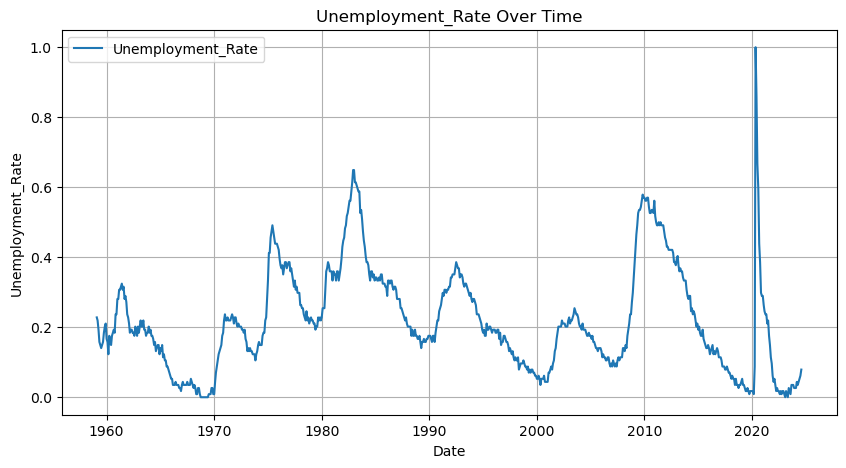

first and last several elements of GDP_Growth
            A191RL1Q225SBEA
Date                       
1959-01-31         0.568720
1959-02-28         0.576093
1959-03-31         0.583465
1959-04-30         0.590837
1959-05-31         0.543444
            A191RL1Q225SBEA
Date                       
2024-03-31         0.483939
2024-04-30         0.491311
2024-05-31         0.490258
2024-06-30         0.489205
2024-07-31         0.488152
Data saved to the specified directory




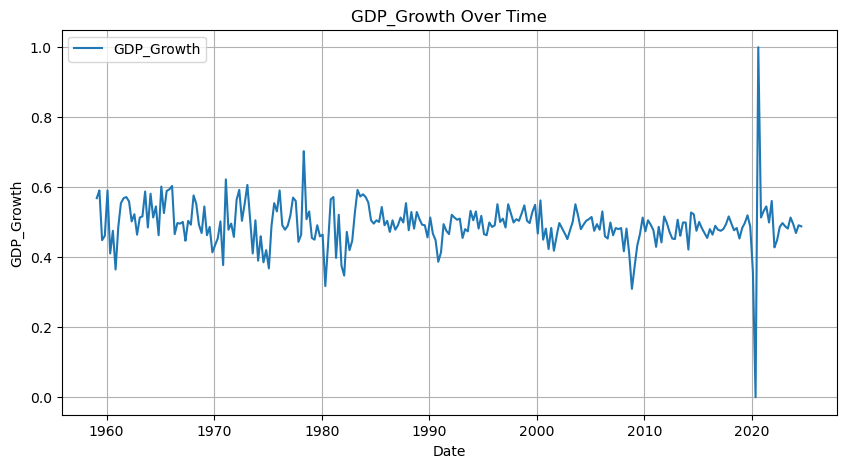

first and last several elements of CPI
            CPIAUCSL
Date                
1959-01-31  0.196402
1959-02-28  0.181503
1959-03-31  0.139275
1959-04-30  0.126698
1959-05-31  0.139224
            CPIAUCSL
Date                
2024-03-31  0.328311
2024-04-30  0.321218
2024-05-31  0.314722
2024-06-30  0.298132
2024-07-31  0.294986
Data saved to the specified directory




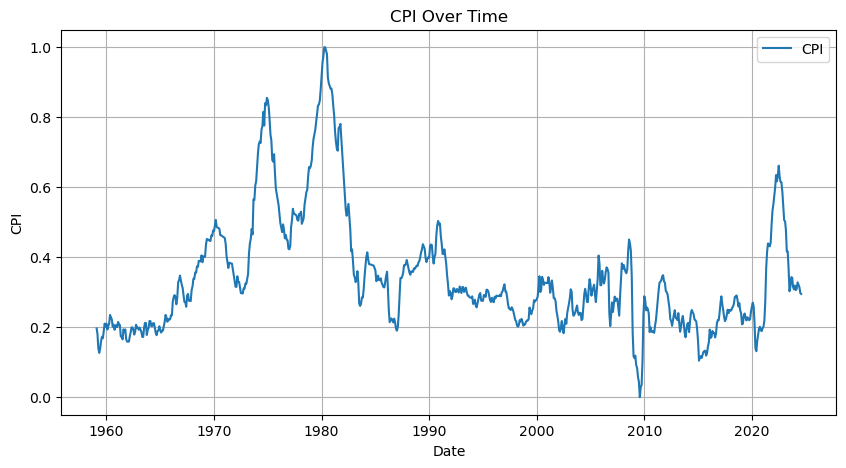

first and last several elements of Interest_Rate
            FEDFUNDS
Date                
1959-01-31  0.127559
1959-02-28  0.124934
1959-03-31  0.144357
1959-04-30  0.152756
1959-05-31  0.149606
            FEDFUNDS
Date                
2024-03-31  0.277165
2024-04-30  0.277165
2024-05-31  0.277165
2024-06-30  0.277165
2024-07-31  0.277165
Data saved to the specified directory




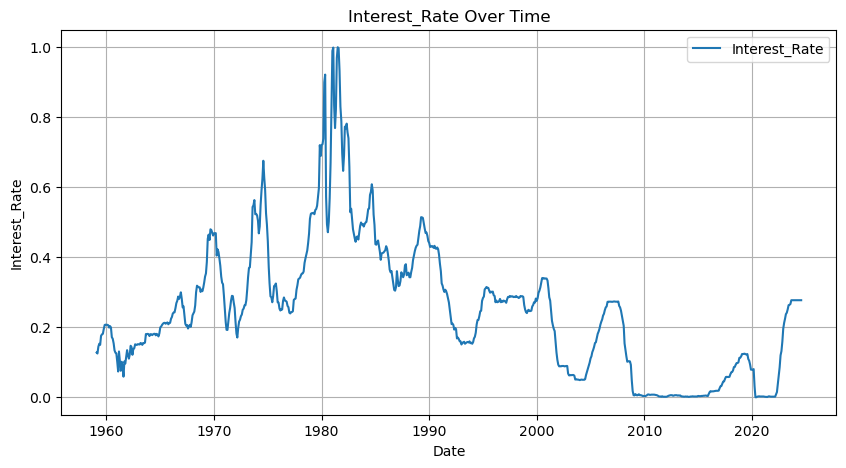

first and last several elements of Money_Supply
                M2SL
Date                
1959-01-31  0.278049
1959-02-28  0.278049
1959-03-31  0.278049
1959-04-30  0.278049
1959-05-31  0.278049
                M2SL
Date                
2024-03-31  0.147537
2024-04-30  0.174773
2024-05-31  0.172461
2024-06-30  0.184315
2024-07-31  0.191316
Data saved to the specified directory




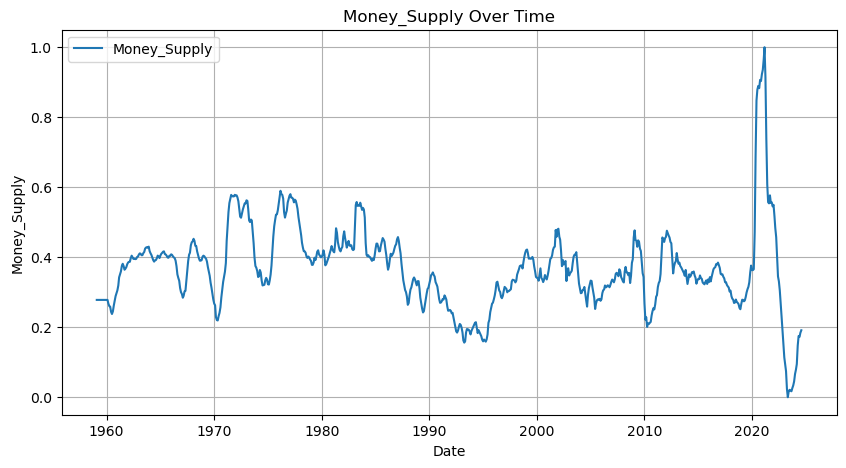

first and last several elements of PPI
              PPIACO
Date                
1959-01-31  0.422624
1959-02-28  0.422624
1959-03-31  0.406549
1959-04-30  0.422573
1959-05-31  0.414536
              PPIACO
Date                
2024-03-31  0.387177
2024-04-30  0.407239
2024-05-31  0.422947
2024-06-30  0.426595
2024-07-31  0.441477
Data saved to the specified directory




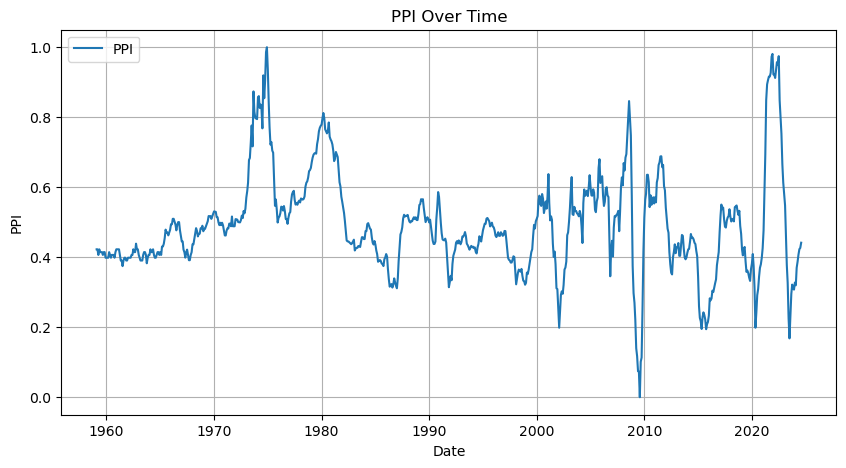

first and last several elements of Consumer_Confidence
             UMCSENT
Date                
1959-01-31  0.730645
1959-02-28  0.730645
1959-03-31  0.730645
1959-04-30  0.730645
1959-05-31  0.730645
             UMCSENT
Date                
2024-03-31  0.474194
2024-04-30  0.438710
2024-05-31  0.308065
2024-06-30  0.293548
2024-07-31  0.264516
Data saved to the specified directory




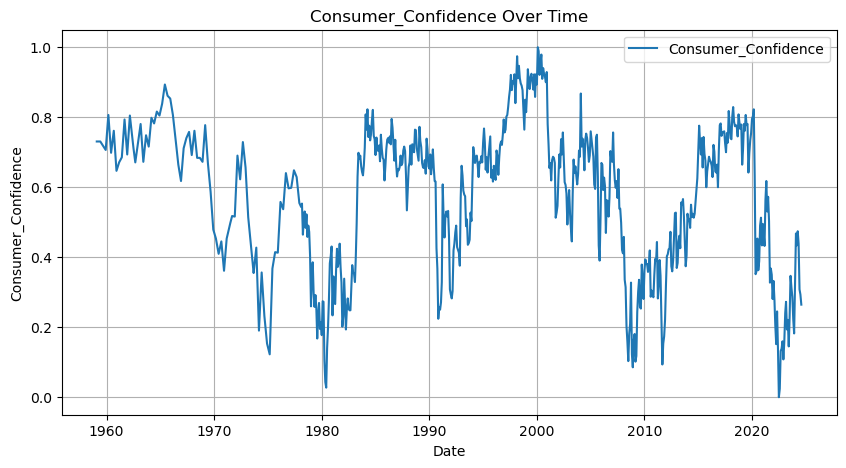

In [3]:
import sys
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Add the 'src' directory to the Python path
src_path = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_path)

# Now you can import your function
from data_collection import fetch_data_from_fred

# Define your FRED API key
api_key = 'e916710d165717e6348556cdce8111f3'

# Define the series IDs for the indicators you want to collect
series_ids = {
    'Unemployment_Rate': 'UNRATE',
    'GDP_Growth': 'A191RL1Q225SBEA',
    'CPI': 'CPIAUCSL',
    'Interest_Rate': 'FEDFUNDS',
    'Money_Supply': 'M2SL',
    'PPI': 'PPIACO',
    'Consumer_Confidence': 'UMCSENT'
}

scaler = MinMaxScaler()

# Define output directory for files
output_dir = 'C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed'
png_out_dir = 'C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed'

starting_dates = []
ending_dates = []

for name, series_id in series_ids.items():
    # Fetch the data
    data = fetch_data_from_fred(series_id, api_key)
    
    # Ensure the index is datetime
    data.index = pd.to_datetime(data.index)
    
    # Record the first and last date
    starting_dates.append(data.index.min())
    ending_dates.append(data.index.max())

# Find the latest starting date and earliest ending date
latest_start_date = max(starting_dates)
earliest_end_date = min(ending_dates)
print(f"Latest starting date among all series: {latest_start_date.date()}")
print(f"Earliest ending date among all series: {earliest_end_date.date()}")

# Show plot for each data series and save as CSV and PNG files
for name, series_id in series_ids.items():
    # Fetch the data
    data = fetch_data_from_fred(series_id, api_key)

    data.index = pd.to_datetime(data.index)

    if name == 'CPI':
        data['CPIAUCSL'] = data['CPIAUCSL'].pct_change(periods=12)*100
    if name == 'Money_Supply':
        data['M2SL'] = data['M2SL'].pct_change(periods=12)*100
    if name == 'PPI':
        data['PPIACO'] = data['PPIACO'].pct_change(periods=12)*100

    # Trim data to the date range
    data = data[(data.index >= latest_start_date) & (data.index <= earliest_end_date)]
    
    # Resample to monthly frequency
    data_monthly = data.resample('ME').mean()
    
    # Apply linear interpolation for missing values
    data_interpolated = data_monthly.interpolate(method='linear')
    data_interpolated = data_interpolated.bfill()

    # Normalize the data
    data_normalized = data_interpolated
    data_normalized[[series_id]] = scaler.fit_transform(data_normalized[[series_id]])
    
    # Save the file as csv
    csv_file_path = os.path.join(output_dir, f'{name}_data_preprocessed.csv')
    data_normalized.index.name='Date'
    data_normalized.to_csv(csv_file_path, index=True)
    print(f'first and last several elements of {name}')
    print(data_normalized.head())
    print(data_normalized.tail())
    print('Data saved to the specified directory')
    print('\n')

    # Plot and save each data series as a PNG
    plt.figure(figsize=(10, 5))
    plt.plot(data_normalized.index, data_normalized[series_id], label=name)
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.title(f'Normalized {name} Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Save the plot as a PNG file
    png_file_path = os.path.join(png_out_dir, f'{name} normalized.png')
    plt.savefig(png_file_path)
    plt.close()
    print(f"Plot saved to {png_file_path}")
    print(data.head())


